In [2]:
import numpy as np
import pandas as pd

my_data = pd.read_csv('diabetes.csv') #read the data
my_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#normalize the features using normalization
# mean normalization
# my_data = (my_data - my_data.mean())/my_data.std()
# min-max normalization
my_data = (my_data-my_data.min())/(my_data.max()-my_data.min())
my_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


In [15]:
#seperating data
X = my_data.iloc[:,0:8]
ones = np.ones([X.shape[0],1])
print(X.shape)
X = np.concatenate((ones,X),axis=1)
print(X.shape)

# Y is outcome
Y = my_data.iloc[:,-1]
print(Y)

# Split train, test (Comment out all above, uncomment all below FOR IT TO SPLIT BUT DOESNT WORK!!)
# train_set = my_data.sample(frac=0.80, random_state=0)
# test_set = my_data.drop(train_set.index)

# X = train_set.iloc[:,0:8]
# ones = np.ones([X.shape[0],1])
# X = np.concatenate((ones,X),axis=1)
# Y = train_set.iloc[:,-1]

# testX = test_set.iloc[:,0:8]
# ones = np.ones([testX.shape[0],1])
# testX = np.concatenate((ones,testX),axis=1)
# testY = test_set.iloc[:,-1]

(768, 8)
(768, 9)
0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
763    0.0
764    0.0
765    0.0
766    1.0
767    0.0
Name: Outcome, Length: 768, dtype: float64


In [5]:
def sigmoid(X, weight):
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))

def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def gradient_descent(X, h, y):
    return np.dot(X.T, (h - y)) / y.shape[0]

def update_weight_loss(weight, learning_rate, gradient):
    return weight - (learning_rate * gradient)

In [22]:
# Initialize theta with zeros
weight = np.zeros(X.shape[1])

num_iter = 1000
learning_rate = 0.5
cost = []


for i in range(num_iter):
    h = sigmoid(X, weight)  
    cost.append(loss(h, Y))
    gradient = gradient_descent(X, h, Y)
    weight = update_weight_loss(weight, learning_rate, gradient)
    
print(h)
print(weight)
print(X.T.shape)

[0.64228472 0.10430292 0.70263806 0.09064602 0.78730608 0.20207084
 0.12812272 0.54874095 0.77686531 0.16562637 0.20609394 0.74955735
 0.72764268 0.80064253 0.65279249 0.41427716 0.34063154 0.23238751
 0.33354399 0.26870473 0.37986865 0.33074304 0.81229615 0.31742186
 0.64796726 0.47085382 0.58851276 0.11104372 0.61854501 0.2751694
 0.43972608 0.55270659 0.10485895 0.08921513 0.46114716 0.27585665
 0.55250435 0.41185212 0.18813293 0.59559058 0.61091301 0.53341312
 0.21289573 0.8364595  0.56808055 0.82127755 0.3901745  0.08196161
 0.33369799 0.15809147 0.09372918 0.15505213 0.1369909  0.8005631
 0.70329104 0.06207228 0.81578733 0.30356263 0.66759353 0.19957888
 0.06382488 0.45914301 0.0696009  0.36645492 0.3570182  0.17741556
 0.22926539 0.39265013 0.08737619 0.32850381 0.23614217 0.39947022
 0.64495902 0.28846206 0.08825285 0.01233832 0.13059483 0.2234083
 0.50060238 0.15826743 0.17007742 0.0458645  0.21569823 0.10071538
 0.45118693 0.24182773 0.49799534 0.2025057  0.70065626 0.1250400

In [ ]:
[ 6.14622246  0.43821679 -0.57418357  0.22761349  0.41140748  1.41463246
 -3.20252382 -0.86138528]

[-5.00884042  1.54244611  4.71877901 -1.36425689  0.25063489  0.28506778
  2.60492129  1.54063735  1.22394819]

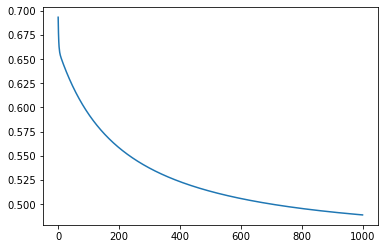

In [7]:
import matplotlib.pyplot as plt

plt.plot(cost)
plt.show()

In [8]:
def predict(x, theta):
    return (sigmoid(X, weight) >= 0.5).astype(int)


def get_accuracy(x, y, theta):
    y_pred = predict(x, theta)
    return (y_pred == y).sum() / y.shape[0]


# Chnge X to testX & Y to testY to test split
print(get_accuracy(X, Y, weight))

0.7708333333333334
